# Correlations between Entity Graph Evaluation Metrices and Text Features 

#### Entity Graph Project  
**Julia Suter, 2017**

This Jupyter notebook visualizes the correlations between the entity graph metrices (discrimination accurarcy, insertion score and insertion accuracy) and the features of the respective texts. The feature set includes the number of sentences per text, the number of discourse entities per text, percentage of connected sentence pairs, the coherence measure (= average outdegree), average frequencies of discourse entities, and average number of discourse entities per sentence.

In these experiments, 2908 documents from the TüBa-D/Z corpus were used. 

## Contents:
* [Code to start it all](#code)
* [Number of Sentences](#sentences)
* [Number of Entities](#entities)
* [Coherence Measure](#coherence)
* [Percentage of Connected Sentence Pairs](#sentpairs)
* [Average Frequencies of Discourse Entities](#freqents)
* [Average Number of Entities per Sentence](#avg_n_entities)

<a class="anchor" id="#code"></a>

In [1]:
## Import Statements and Figure Settings
import numpy as np
import matplotlib.pyplot as plt
import copy
import pandas as pd
from pandas import *
import pickle
from __future__ import division
import pylab as pl

# Matplot Settings
#%matplotlib inline    # notebook, inline, qt

# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size


In [2]:
## Juypter notebook shortcut for executing code quickly
## Not relevant for the entity graph project

In [3]:
%%javascript

Jupyter.keyboard_manager.command_shortcuts.add_shortcut('r', {
    help : 'run all cells',
    help_index : 'zz',
    handler : function (event) {
        IPython.notebook.execute_all_cells();
        return false;
    }}
);

<IPython.core.display.Javascript object>

In [4]:
# Load scores
feature_array = np.load('docs/parsed_texts_array.npy')

# Load IDs of docs with few sentences and entities
few_sents = pickle.load(open("docs/few_sent_doc_IDs_unparsed.txt", "rb" ) )
few_ents = pickle.load(open("docs/few_ent_doc_IDs_unparsed.txt","rb"))

# Use all documents; or chose a subset
use_all = True
#filtered_out_samples = few_sents
#filtered_out_samples = few_ents
#filtered_out_samples = list(set(few_sents+few_ents))
#filtered_out_samples = [elem for elem in few_sents if elem in few_ents]

# Adapt scores according to chosen subset
if not use_all:
    mask = np.ones_like(feature_array,dtype=np.bool)
    mask[filtered_out_samples] = False
    scores = feature_array[mask[:,0],:]
else:
    scores = feature_array

# Get scores
coh_measure = scores[:,0]
ins_score = scores[:,1]
ins_acc = scores[:,2]
disc_acc= scores[:,3]

# Get features
number_sentences = scores[:,4]
number_entities = scores[:,5]
avg_freqs_of_disc_ents = scores[:,6]
avg_number_of_ents_per_sent = scores[:,7]
number_of_connected_sent_pairs = scores[:,8]

# Normalized scores (mostly unused)
norm_scores = copy.deepcopy(scores)
norm_scores[:,1] = ((norm_scores[:,1] - np.min(norm_scores[:,1]))/(np.max(norm_scores[:,1])-np.min(norm_scores[:,1])))
norm_scores[:,2] = ((norm_scores[:,2] - np.min(norm_scores[:,2]))/(np.max(norm_scores[:,2])-np.min(norm_scores[:,2])))

# Combined score
combined_scores =  np.mean(norm_scores[:,1:3],axis=1)

# Print Min ans Max coherence measure
#'Max score:', np.max(coh_measure), 'Min score:', np.min(coh_measure)

In [5]:
# Plotting function
def plotting(x,y,x_label, y_label, median=False, min_range=1, max_range=None, baseline=False, floating=False):
    """
    Plot moving average of x and y
    Mathematical average as default; median as optional feature (here unused)
    Min and max range of moving average can be set individually
    """
    
    # start lists
    moving_avg = []
    index = []  
    
    # set max range
    max_range = int(x.max())+2 if max_range == None else max_range
      
    # iterate over every integer in range min, max
    for i in range(min_range,max_range):
        
        # compute moving average (used to make trends more visible)
        scores_for_i = [y[j] for j in range(0,y.shape[0]) if x[j] > i-1 and x[j] <= i+2]
    
        # Variations: (not used here)
        # scores_for_i = [y[j] for j in range(0,y.shape[0]) if x[j] in range(i,i+1)]
        # scores_for_i = [y[j] for j in range(0,y.shape[0]) if x[j] > i and x[j] <= i+1]

        # skip if nothing is found
        if len(scores_for_i)==0:
            continue
        # average, or median
        if median:
            moving_avg.append(np.median(scores_for_i)) 
        else:
            moving_avg.append(np.mean(scores_for_i)) 
        index.append(i)
      
    # adaption for floating point steps...
    if floating:
        
        # start lists
        moving_avg = []
        index = []  
        
        # iterate over floats (/2) in range min, max
        for i in [k/2 for k in range(min_range, max_range*2)]:
            scores_for_i = [y[j] for j in range(0,y.shape[0]) if x[j] > i-0.5 and x[j] <= i+1]
    
            if len(scores_for_i)==0:
                continue
            # average, or median
            if median:
                moving_avg.append(np.median(scores_for_i)) 
            else:
                moving_avg.append(np.mean(scores_for_i)) 
            index.append(i)
        
     
    
    # make a scatter plot
    plt.scatter(x,y,edgecolors='',color='c', alpha=0.25)
    plt.xlabel(x_label)
    plt.ylabel(y_label)  
    plt.plot(index,moving_avg,color='b',lw=2)
    
    # only used once in Chapter "Number of sentences"
    if baseline:
        baseline_scores = [100/ind/100 for ind in index]
        plt.plot(index, baseline_scores, color='orange',lw=2)
    
    # optional settings:
    # plt.title('Plot title')
    # plt.xlim([x.min()-x.max()*0.05, x.max()+x.max()*0.10])
    # plt.ylim([y.min()-y.max()*0.10, y.max()+y.max()*0.10])
    plt.show()
    

## Number of sentences <a class="anchor" id="sentences"></a>
This section shows how the number of sentences in a text influences the coherence measure and evaluation scores. In the employed dataset there are texts with lengths from 2 to 65 sentences. However, a large number of texts contain 5 sentences or less. That is problematic as short texts may not be suitable for entity graph experiments.

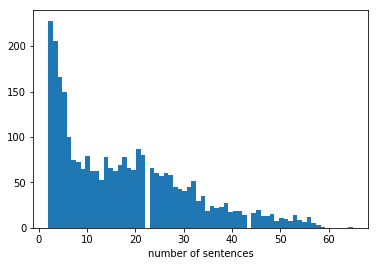

In [6]:
int_number_sentences = np.array([int(n) for n in number_sentences])
plt.hist(int_number_sentences,bins=int_number_sentences.max()+1)
plt.xlabel('number of sentences')
plt.show()

####  Insertion accuracy and score
The first plot below shows that the insertion **accuracy decreases** with increased number of sentences. The effect can be observed best for texts with 1 to 10 sentences. The insertion accuracy measures how often an extracted sentence could be reinserted at the correct position in a text, so naturally the task becomes more difficult with an increasing number of sentences since the number of possible insertion positions increases as well. This becomes becomes evident when looking at the <span style="color:orange">baseline</span> that simply guesses the right position: insertion accuracy decreases as the text becomes longer: 0.5% accuracy for texts with 2 sentences, 0.33% for 3 sentences, 0.25% for texts with 4 sentences, and so on. The baseline is even identical to one line of datapoints in the plot. These datapoints possibly represent texts where the all/most of the re-inserted versions yielded the same coherence measure so it was arbitrarily decided which one would be the predicted original version. 

The **insertion score** attemps to even out this bias by including the total text length in the metric, thus in the second plot there is no visible decrease (nor increase) in performance.

The combined measure is the mean of the normalized insertion accuracy and insertion score. This is not an official measure but merely an experimental measure set up by me to compare the two metrices.
The plot with the combined measure for insertion accuracy and score shows that both scores basically even out each other. There is a slight decrease in the range of 1 to 5 sentences, but otherwise there are no visible trends.

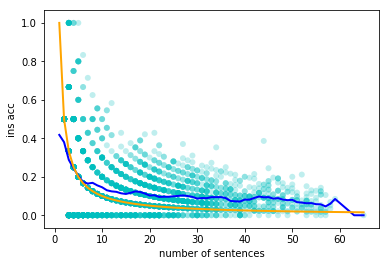

In [7]:
plotting(number_sentences, ins_acc,  'number of sentences', 'ins acc', baseline=True) 

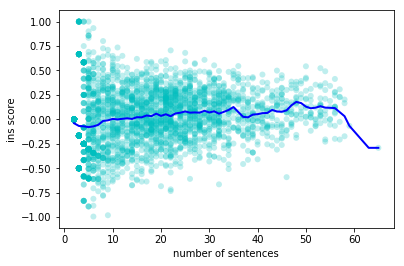

In [8]:
plotting(number_sentences, ins_score, 'number of sentences','ins score', min_range=2)

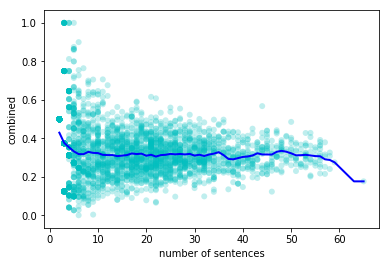

In [9]:
plotting(number_sentences, combined_scores, 'number of sentences','combined',min_range=2)

#### Discrimination accuracy

This plot shows that the discrimination accuracy clearly increases with increased number of sentences. The effect can be observed best for texts in the range of 1 to 10 sentences. This effect is closely related to one that can be observerd in the [Number of entity](#entities) section below because larger number of sentences lead to larger number of entities, which then increases the coherence score of a text and thus faciliates the discrimination task. 

In the discrimination task the sentences of a text are scrambled, and the accuracy measures how often the coherence score of the original text is higher than the coherence score of the scrambled text. Scrambling a long text changes the structure more strongly than scrambling a short text, so the scrambled versions of long texts are less likely to have a similarly high coherence score, which makes the task easier.

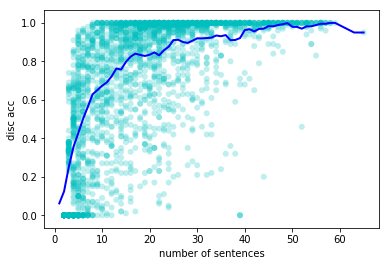

In [10]:
plotting(number_sentences, disc_acc, 'number of sentences','disc acc')

#### Coherence measure
This plot shows that the coherence measure is slightly higher for texts with increased number of sentences. Note that there are only few samples for texts with more than 50 sentences, which may explain the stronger fluctuations in that area. 

Long texts usually have a larger number of entities (see [here](#entities)), which are repeated throughout the text and contribute to coherence. The mere number of entities, however, should not have a great impact since the coherence measure consists of the average outdegree of all sentence pairs. An explanation for higher coherence scores in long texts may be that long texts simply contain more intertwined and complex information, while short texts often represent a summary, which can be more abstract and naturally contains fewer entity repetitions.

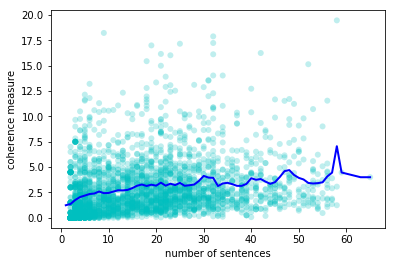

In [11]:
plotting(number_sentences, coh_measure, 'number of sentences','coherence measure')

## Number of entities  <a class="anchor" id="entities"></a>

This section explores the correlation between evaluation metrices and the number of entities per text. The texts in the employed dataset have between 0 and 43 entities. However, texts with more than 25 entities are rare; most texts have 5 entities or less.

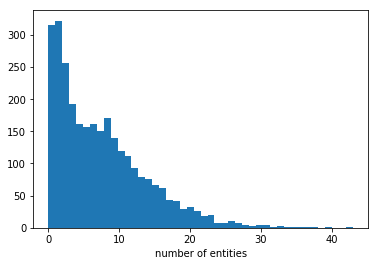

In [12]:
int_number_entities= np.array([int(n) for n in number_entities])
plt.hist(int_number_entities,bins=int_number_entities.max()+1)
plt.xlabel('number of entities')
plt.show()

#### Correlation between number of sentences and number of entities

There is a strong correlation between the number of sentences and number of entities. This is only natural as new entities are introduced as the text advances. This correlation explains the similarity between the plots shown in the [Number of sentence](#sentences) section and the current [Number of entities](#entities) section.

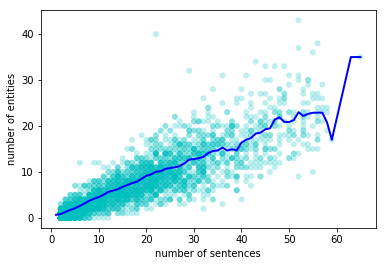

In [13]:
plotting(number_sentences,number_entities, 'number of sentences', 'number of entities')

#### Insertion accuarcy and scores

The insertion accuracy slightly decreases (at least for range 0 to 5 entities) while the insertion scores seems to minimally increase and the combined measure remains stable. The same effect is visible in the [Number of sentence](#sentences) section because the number of sentences and entities correlate strongly. 

I decided to only show the moving average for the range 0 to 25 entities because the scarcity of samples with more than 25 entities causes fluctuations, which should not be considered when interpreting these plots.

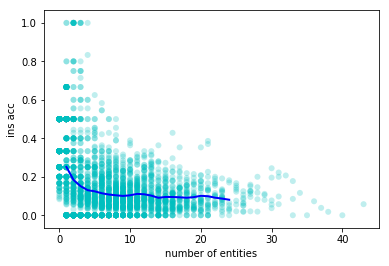

In [14]:
plotting(number_entities, ins_acc,  'number of entities','ins acc', max_range=25)

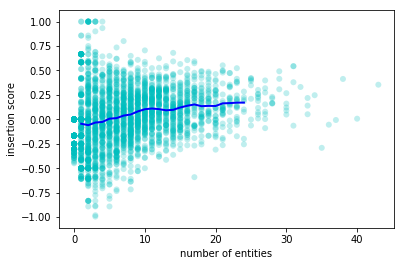

In [15]:
plotting(number_entities, ins_score, 'number of entities','insertion score',max_range=25)

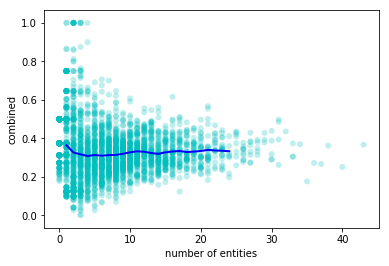

In [16]:
plotting(number_entities, combined_scores, 'number of entities','combined', max_range=25)

#### Discrimination accuracy
Discrimination accuracy correlates with the number of entities in a text. Texts with less than 10 entities yield clearly worse results than texts with a higher number of entities. This is not surprising as a text with fewer discourse entities represents a more difficult example in the discrimination task: there is less information available on which the entity graph and coherence measure is built upon. Note that there is a correlation between number of entities and number of sentences in a text, so texts with few entities also have few sentences. Fewer sentences increase difficulty for the discrimination task, as explained above.

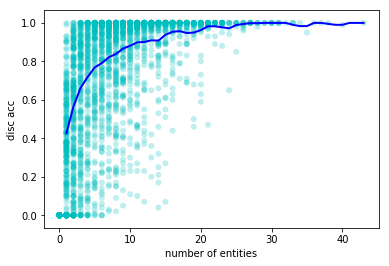

In [17]:
plotting(number_entities, disc_acc,'number of entities','disc acc')

#### Coherence measure
The coherence measure seems to increase slightly with the number of entities (but only up to the level of 10 entities), similary to experiment above with the number of sentences. Note that texts with 0 entities always yield a coherence measure of 0 and that there are not sufficient samples with more than 25 entities. 

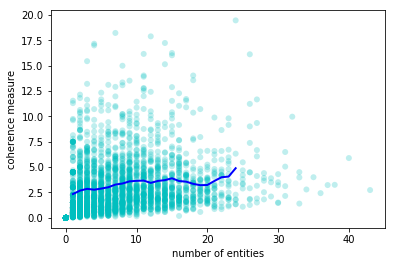

In [18]:
plotting(number_entities, coh_measure, 'number of entities', 'coherence measure', max_range=25)

## Coherence Measure  <a class="anchor" id="coherence"></a>
This section looks at the coherence measure in correlation with the evaluation scores and text features.
Most frequent is the coherence measure 0, which means that no discourse entities were found in the text, possibly because the text is too short. Most scores remain below 4, while higher scores are relatively rare. 

#### Insertion accuracy and scores
There is no strong correlation between coherence measure and insertion accuracy. For the insertion score, there seems to be a very slight increase in performance for the texts with higher coherence measures (in the range of coherence scores between 0 and 2.5). 
The insertion task as well as the discrimination task become less challenging for texts with higher coherence measure since the version with the wrongly re-inserted sentence (or the scrambled version, resp.) have clearly lower coherence measures and are therefore easy to distinguish from their original version.

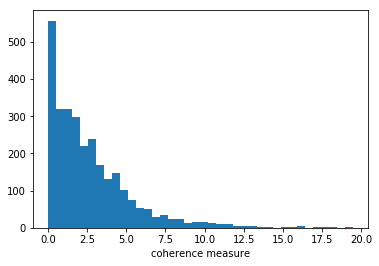

In [19]:
plt.hist(coh_measure,bins=int(coh_measure.max())*2)
plt.xlabel('coherence measure')
plt.show()

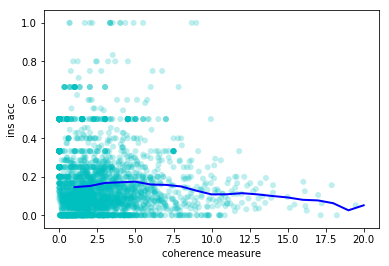

In [20]:
plotting(coh_measure, ins_acc,  'coherence measure','ins acc')

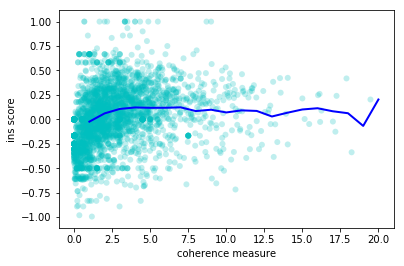

In [21]:
plotting(coh_measure, ins_score,  'coherence measure','ins score')

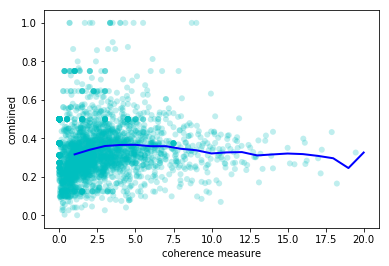

In [22]:
plotting(coh_measure, combined_scores, 'coherence measure','combined')

#### Discrimination accuracy
Discrimination accuracies increase with higher coherence scores. This makes sense when considering that discrimination experiments scramble up a text and change sentence order. Since texts with originally high coherence measures show significantly lower coherence measures when scrambled up, it is easy to find the correct version. If the coherence score is low to begin with, the difference to scrambed versions is not as evident, which makes the discrimination task more difficult.

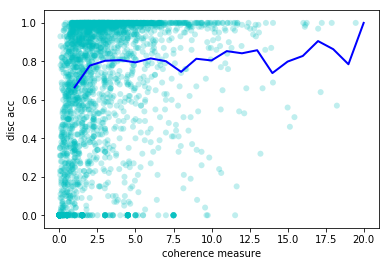

In [23]:
plotting(coh_measure, disc_acc,  'coherence measure','disc acc')

## Percentage of connected sentence pairs <a class="anchor" id="sentpairs"></a>
This section shows the percentage of connected sentence pairs per text. Two sentences are connected if they have at least one discourse entity in common and therefore have an edge between the sentence nodes in the entity graph. In most texts, less than 20% of all sentence pairs are connected. The two scatter plots below show that the samples with 0% or 100% connected sentence pairs are texts with very few sentences and entities. There are only few samples for which more than 40% of all sentence pairs are connected, so I discarded them in the evaluation of these plots.

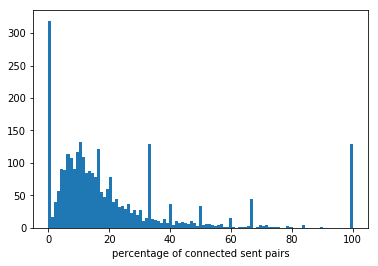

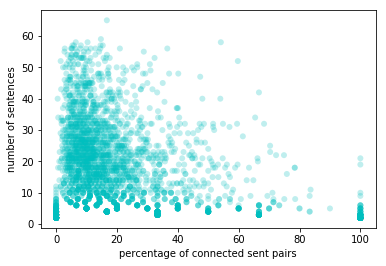

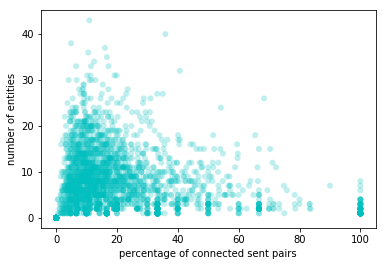

In [24]:
plt.hist(number_of_connected_sent_pairs,bins=int(number_of_connected_sent_pairs.max())+1)
plt.xlabel('percentage of connected sent pairs')
plt.show()

y = int_number_sentences
x = number_of_connected_sent_pairs
plt.scatter(x,y,edgecolors='',color='c',alpha=0.25)
plt.xlabel('percentage of connected sent pairs')
plt.ylabel('number of sentences') 
plt.show()

y = int_number_entities
x = number_of_connected_sent_pairs
plt.scatter(x,y,edgecolors='',color='c',alpha=0.25)
plt.xlabel('percentage of connected sent pairs')
plt.ylabel('number of entities') 
plt.show()

#### Insertion accuracy and score

In all three of the following plots (about insertion accuracy, score and the combined measure) the performance slightly increases with the percentage of connected sentence pairs in a text. This is probable due to the fact that texts with many connected sentence pairs are more coherent, show high coherence measure and are thus easier examples for the insertion task. 

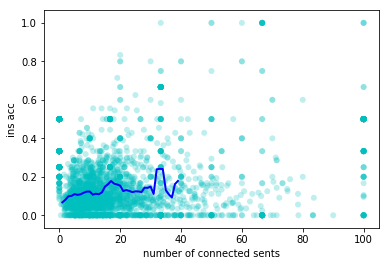

In [25]:
plotting(number_of_connected_sent_pairs, ins_acc,  'number of connected sents','ins acc', max_range=40)

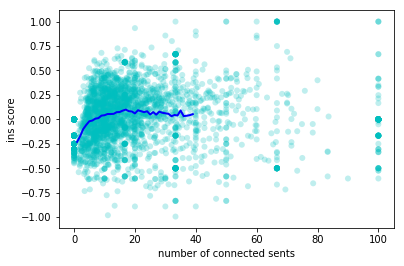

In [26]:
plotting(number_of_connected_sent_pairs, ins_score, 'number of connected sents','ins score', max_range=40)

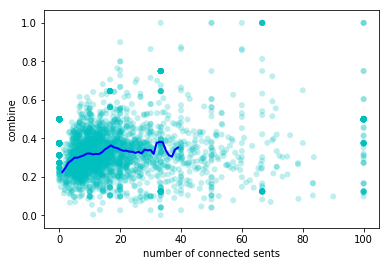

In [27]:
plotting(number_of_connected_sent_pairs, combined_scores, 'number of connected sents','combine', max_range=40)

#### Coherence measure

Since the average outdegree represents how strongly the sentences in a text are connected by discourse entities, there is a clear correlation between percentage of connected sentence pairs and coherence measure.

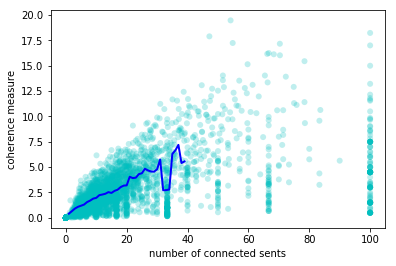

In [28]:
plotting(number_of_connected_sent_pairs, coh_measure, 'number of connected sents','coherence measure', max_range=40)

#### Discrimination accuracy

In the discrimination task, the correlation is not as visible as in the insertion task plots. If a text contains many sentence pairs that are connected through discourse entities, these entities might appear in adjacing sentences in the scrambled versions as well and lead to a high coherence measure, which makes it harder to discriminate from the original version.

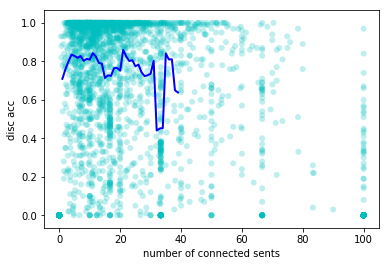

In [29]:
plotting(number_of_connected_sent_pairs, disc_acc, 'number of connected sents','disc acc', max_range=40)

## Average frequencies of discourse entities <a class="anchor" id="freqents"></a>
This section treats the average frequency of discourse entities; or in other words: how often does a discourse entity occur in a text on average. In the plot below you can see that there is no discourse entity occuring only once - this is because single discourse entities are not included in the entity grid. A few texts have an average frequency of 0; this happens when the text contains no discourse entities at all. Ideally, those texts are removed from the dataset. Most texts contain between 2 and 4 entities on average.

Note that the increased density of datapoints on integer values (mainly 0, 2, 3 and 4) in the plots below is caused by texts that include soley one discourse entity (which appears 2, 3 or 4 times). For these texts, the average frequency is simply the frequency of the one discourse entity.

There are hardly any samples for texts with average frequencies above 6 so these samples may not be sufficient to give a representative picture and should therefore not be considered when evaluating the plots.

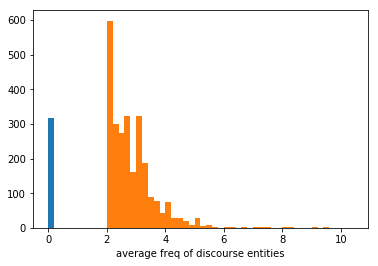

In [30]:
avg_freqs_of_disc_ents = np.nan_to_num(avg_freqs_of_disc_ents)
bins = np.arange(0,avg_freqs_of_disc_ents.max()+1,0.2)
plt.hist(avg_freqs_of_disc_ents,bins)
plt.hist(avg_freqs_of_disc_ents[avg_freqs_of_disc_ents!=0],bins)
plt.xlabel('average freq of discourse entities')
plt.show()

#### Coherence Measure
High frequencies of discourse entities mean that entities appear often across the text, which leads to large amount of connected sentence pairs (= edges in the graph), and therefore high coherence scores. The correlation between the percentage of connected sentence pairs and coherence measure is already shown in the section about [Percentage of connected sentence pairs](#sentpairs).


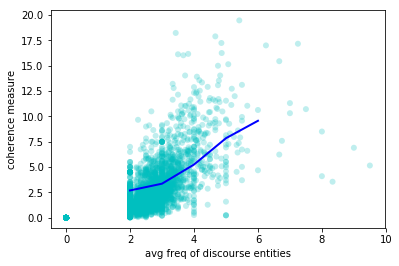

In [31]:
plotting(avg_freqs_of_disc_ents, coh_measure, 'avg freq of discourse entities','coherence measure', min_range=2, max_range=7)
#plt.xlim([1.9,5.0])
#.ylim([-0.1,10])

#### Insertion accuracy and score
The insertion accuracy and score slightly drop or remain unchanged with higher average entity frequencies. A similar effect could be observed in the [Number of sentences](#sentences) and [Number of entities](#entities) sections.

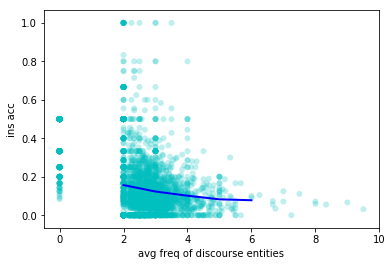

In [32]:
plotting(avg_freqs_of_disc_ents, ins_acc,  'avg freq of discourse entities','ins acc', min_range=2, max_range=7)

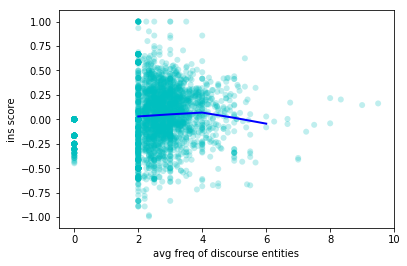

In [33]:
plotting(avg_freqs_of_disc_ents, ins_score, 'avg freq of discourse entities','ins score', min_range=2, max_range=7)

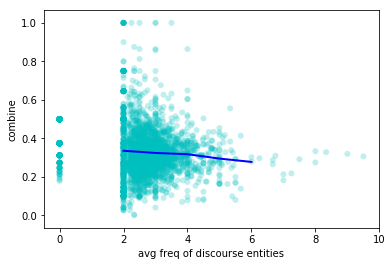

In [34]:
plotting(avg_freqs_of_disc_ents, combined_scores, 'avg freq of discourse entities','combine', min_range=2, max_range=7)

#### Discrimination accuarcy
The discrimination accuracy improves with increasing frequencies of discourse entities. This can be observed best in the range of frequency 2 and 4. For higher average frequencies the samples are not sufficient to confirm or deny this trend.

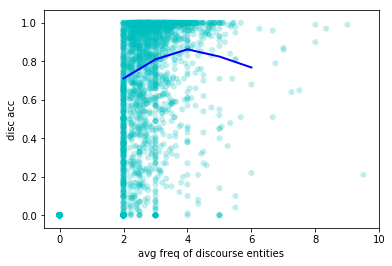

In [35]:
plotting(avg_freqs_of_disc_ents, disc_acc, 'avg freq of discourse entities','disc acc',  min_range=2, max_range=7)

## Average number of entities per sentences <a class="anchor" id="avg_n_entities"></a>
This section discusses the average number of entities per sentence. Again, texts with 0 entities should be filtered out in the final dataset. Most texts have only 1 or 2 entities per sentence, which is sufficient for building a coherent text. There are only few samples with an average number of entities that is higher than 2.5 so they should not be considered in the evaluation of the plot as they might not be representative.

Note that as above in the [Average frequencies of discourse entities](#freqents) section, there is higher density of datapoints for the values [1, 1.5, 2].  This effect is caused by texts that solely consist of 1 or 2 sentences and contain only 1 or 2 discourse entities.

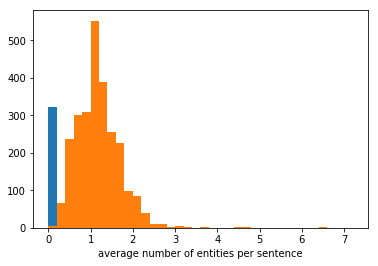

In [36]:
avg_number_of_ents_per_sent = np.nan_to_num(avg_number_of_ents_per_sent)
bins = np.arange(0,avg_number_of_ents_per_sent.max()+1,0.2)
plt.hist(avg_number_of_ents_per_sent,bins)
plt.hist(avg_number_of_ents_per_sent[avg_number_of_ents_per_sent!=0],bins)
plt.xlabel('average number of entities per sentence')
plt.show()

#### Insertion accuracy and score

The insertion accuracy and score do not change significantly with an increased average number of entities per sentence, possibly because the distribution is not strong enough.

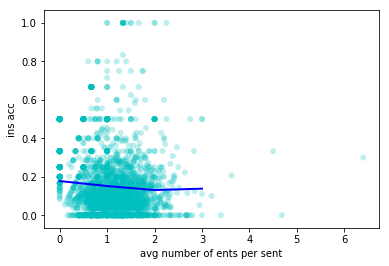

In [37]:
plotting(avg_number_of_ents_per_sent, ins_acc,  'avg number of ents per sent','ins acc', min_range=0, max_range=4)

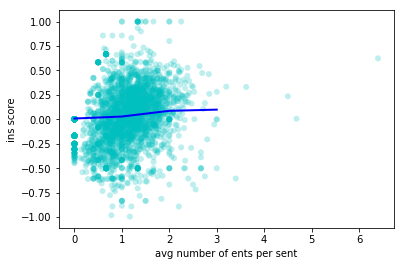

In [38]:
plotting(avg_number_of_ents_per_sent, ins_score,  'avg number of ents per sent','ins score', min_range=0, max_range=4)

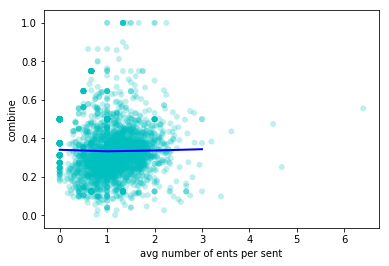

In [39]:
plotting(avg_number_of_ents_per_sent, combined_scores,'avg number of ents per sent','combine', min_range=0, max_range=4)

#### Discrimination accuracy and coherence measure
Discrimination accuracy increases with higher number of entities per sentence, just like the coherence measure. A larger number of entities (especially when repeated) makes the entity grid richer and therefore the coherence score higher; which in turn faciliates the discrimination task (as established above). The effect is not as visible here as in the [Number of entities](#entities) section above since the indirect information about the the number of sentences is filtered out in the average measure. 

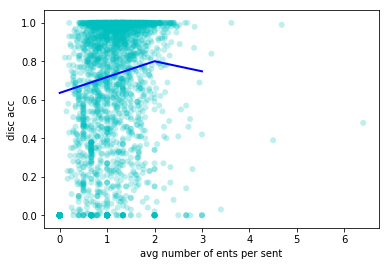

In [40]:
plotting(avg_number_of_ents_per_sent, disc_acc,'avg number of ents per sent','disc acc', min_range=0, max_range=4)

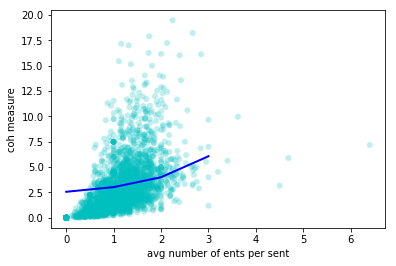

In [41]:
plotting(avg_number_of_ents_per_sent, coh_measure,'avg number of ents per sent','coh measure', min_range=0, max_range=4)